In [1]:
import pickle
from sklearn import linear_model
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA as pca

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os

## Load CAV

In [2]:
working_dir = '/home/tyler/Desktop/tcav_on_azure'

path = os.path.join(working_dir,'cavs/striped_sub_1-random500_0-mixed9-linear-0.1.pkl')

with open(path, 'rb') as f:
    data = pickle.load(f)

/data/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
data

{'accuracies': {'overall': 1.0, 'random500_0': 1.0, 'striped_sub_1': 1.0},
 'bottleneck': 'mixed9',
 'cavs': [array([-0.00295867,  0.        , -0.00861355, ...,  0.        ,
          0.00257292,  0.        ]),
  array([ 0.00295867,  0.        ,  0.00861355, ...,  0.        ,
         -0.00257292,  0.        ])],
 'concepts': ['striped_sub_1', 'random500_0'],
 'hparams': HParams([('alpha', 0.1), ('model_type', 'linear')]),
 'saved_path': '/home/tyler/Desktop/tcav_on_azure/cavs/striped_sub_1-random500_0-mixed9-linear-0.1.pkl'}

In [4]:
d = dict(data)
arr = d['cavs']

In [5]:
#len(arr[0])

In [6]:
d['concepts']

['striped_sub_1', 'random500_0']

In [7]:
x1 = arr[0]
x2 = arr[1]

In [8]:
17 * 17 * 768

221952

In [9]:
len(x2)

131072

In [10]:
x1.mean()

-0.0008748189062643418

## Load x_train

In [250]:
sub_path = 'cavs/striped_sub_2-random500_1-mixed9-linear-0.1'
path = os.path.join(working_dir,sub_path + '_test.pkl')

with open(path, 'rb') as f:
    data = pickle.load(f)

path = os.path.join(working_dir,sub_path + '.pkl')

with open(path, 'rb') as f:
    cav_data = pickle.load(f)
this_cav = cav_data['cavs'][0]

In [251]:
d = dict(data)
x_train = d['x_train']
x_test = d['x_test']
y_train = d['y_train']
y_test = d['y_test']
y_pred = d['y_pred']

In [252]:
x_train.shape

(67, 131072)

In [253]:
y_pred.shape

(33,)

In [254]:
y_test

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [255]:
y_train.sum()

33

In [256]:
y_test.sum()

17

In [257]:
#total_images = 50 + 35
#total_images * .667

In [258]:
#46 + 24

In [259]:
x_train[1]

array([0.        , 0.        , 0.35254025, ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [260]:
#35 * 35 * 288

In [261]:
## TSNE

In [262]:
t = TSNE(n_components=2, perplexity=30).fit(x_train)

In [263]:
#x_train

In [264]:
x_train_embed = TSNE(n_components=2, perplexity=50).fit_transform(x_train)

x1_train = np.array([a[0] for a  in x_train_embed])
x2_train = np.array([a[1] for a  in x_train_embed])

color_train = ['red' if y == 0 else 'blue' for y in y_train]

x_test_embed = TSNE(n_components=2).fit_transform(x_test)

x1_test = np.array([a[0] for a  in x_test_embed])
x2_test = np.array([a[1] for a  in x_test_embed])

color_test = ['red' if y == 0 else 'blue' for y in y_test]

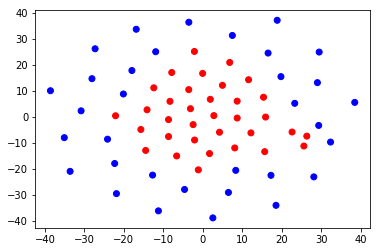

In [265]:
plt.scatter(x1_train, x2_train, color = color_train)
#plt.scatter(x1_test, x2_test, color = color_test)

#plt.legend(['blue'])
#plt.legend(['red'])

path = os.path.join(working_dir,'figs/tsne_striped_2_random_1_layer_9.png')
plt.savefig(path,dpi=200)

In [266]:
#plt.show()

In [267]:
## PCA

In [268]:
pca_instance = pca(n_components=2).fit(x_train)

In [269]:
#pca_instance.get_params()

In [270]:
x_train_embed.shape

(67, 2)

In [271]:
x_train_embed[0]

array([-8.6884775, -7.587836 ], dtype=float32)

In [272]:
# TRAIN
x_train_embed_pca = np.dot(pca_instance.components_, x_train.T)

x1_train_pca = x_train_embed_pca[0]
x2_train_pca = x_train_embed_pca[1]

color_train_pca = ['red' if y == 0 else 'blue' for y in y_train]

# TEST
x_test_embed_pca = np.dot(pca_instance.components_, x_test.T)

x1_test_pca = x_test_embed_pca[0]
x2_test_pca = x_test_embed_pca[1]

light_blue = '#b3b8fb'
light_red = '#f6889f'

color_test_pca = [light_red if y == 0 else light_blue for y in y_test]





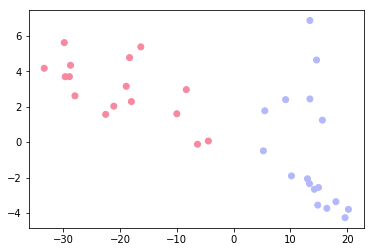

In [273]:
plt.scatter(x1_test_pca, x2_test_pca, color = color_test_pca)

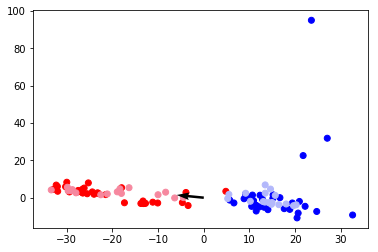

In [276]:
plt.scatter(x1_train_pca, x2_train_pca, color = color_train_pca)
plt.scatter(x1_test_pca, x2_test_pca, color = color_test_pca)


cav_pca = np.dot(pca_instance.components_, this_cav.T)
origin = [0],[0]
plt.quiver(*origin, cav_pca[0], cav_pca[1], color='black',scale=20)


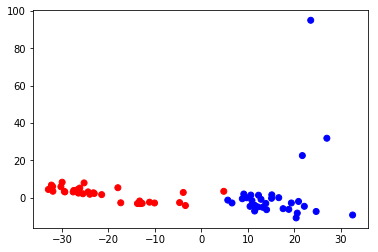

In [275]:
plt.scatter(x1_train_pca, x2_train_pca, color = color_train_pca)

## CAV to PCA Space

In [175]:
path


'/home/tyler/Desktop/tcav_on_azure/cavs/striped_sub_2-random500_0-mixed9-linear-0.1_test.pkl'

In [176]:
path = os.path.join(working_dir,'cavs/striped_sub_2-random500_0-mixed9-linear-0.1.pkl')

with open(path, 'rb') as f:
    data = pickle.load(f)
this_cav = data['cavs'][1]


In [214]:
this_cav.shape

(131072,)

In [215]:
#pca_instance.components_.shape

In [216]:
cav_pca = np.dot(pca_instance.components_, this_cav.T)


In [217]:
cav_pca


array([2.34626385, 0.09866892])

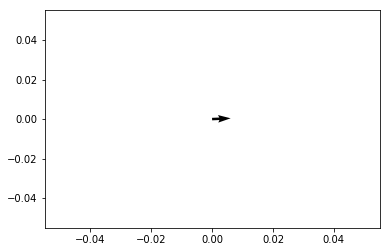

In [219]:
origin = [0],[0]
plt.quiver(*origin, cav_pca[0], cav_pca[1], color='black')
#plt.show()


## Decision boundary

In [34]:
X_Train_embedded = x_train_embed
y_predicted = y_train

In [35]:
from sklearn.neighbors import KNeighborsClassifier

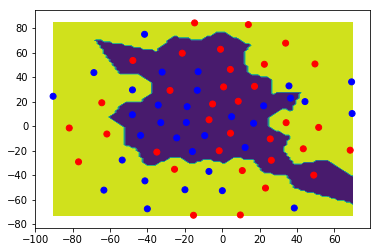

In [122]:
resolution = 100 # 100x100 background pixels
X2d_xmin, X2d_xmax = np.min(X_Train_embedded[:,0]), np.max(X_Train_embedded[:,0])
X2d_ymin, X2d_ymax = np.min(X_Train_embedded[:,1]), np.max(X_Train_embedded[:,1])
xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

# approximate Voronoi tesselation on resolution x resolution grid using 1-NN
background_model = KNeighborsClassifier(n_neighbors=1).fit(X_Train_embedded, y_predicted) 
voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
voronoiBackground = voronoiBackground.reshape((resolution, resolution))

#plot
plt.contourf(xx, yy, voronoiBackground)
plt.scatter(X_Train_embedded[:,0], X_Train_embedded[:,1], c=color_train)
plt.show()

In [74]:
## TSNE example
X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(4, 2)

## Replicate lm

In [ ]:
lm = linear_model.SGDClassifier(alpha=.1)
lm.fit(x_train, y_train)

In [ ]:
lm.predict(x_test)

In [ ]:
y_pred

In [ ]:
#lm.coef_.shape

coef = lm.coef_

In [ ]:
#bound = TSNE(n_components=2).fit_transform(coef)

In [ ]:
coef

## Decision Boundary

In [ ]:
x = np.array([[-1,1],[-1,-1],[1,-1],[1,1]])
y = np.array([0,0,1,1])

In [ ]:
#y

In [ ]:
lm = linear_model.SGDClassifier(alpha=.1)
lm.fit(x, y)

In [ ]:
#x[:, 0].min()

In [ ]:
h = .1  # step size in the mesh
# create a mesh to plot in
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
z = lm.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, cmap ='plasma')


x1 = np.array([a[0] for a  in x])
x2 = np.array([a[1] for a  in x])

color = ['red' if y == 0 else 'blue' for y in y]

plt.scatter(x1, x2, color = color)

In [ ]:
z[0][0]